In [7]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

## 1. Changes across countries 
### A. Visualize mean life ladder score across the countries
### B. Compare the improvement rate across the countries
### 

In [8]:
happy = pd.read_csv("./data/whr-2023.csv")
happy.head(15)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.119,0.954,0.435,0.371


In [9]:
happy_vars = happy.loc[:,~happy.columns.isin(['Country name','year'])]

#### Number of Countries

In [10]:
print(happy['Country name'].unique())
len(happy['Country name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'M

165

### A. Visualize mean life ladder score across the countries

In [11]:
mean_values = happy.groupby('Country name').mean().loc[:, 'Life Ladder':]
mean_life_ladder = mean_values['Life Ladder']
mean_life_ladder_df = mean_life_ladder.reset_index()
mean_life_ladder_df.columns = ['Country name', 'Life Ladder']

/var/folders/q_/_cgc3knd02ncvyg87h9rg1rh0000gn/T/ipykernel_4487/1025387782.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


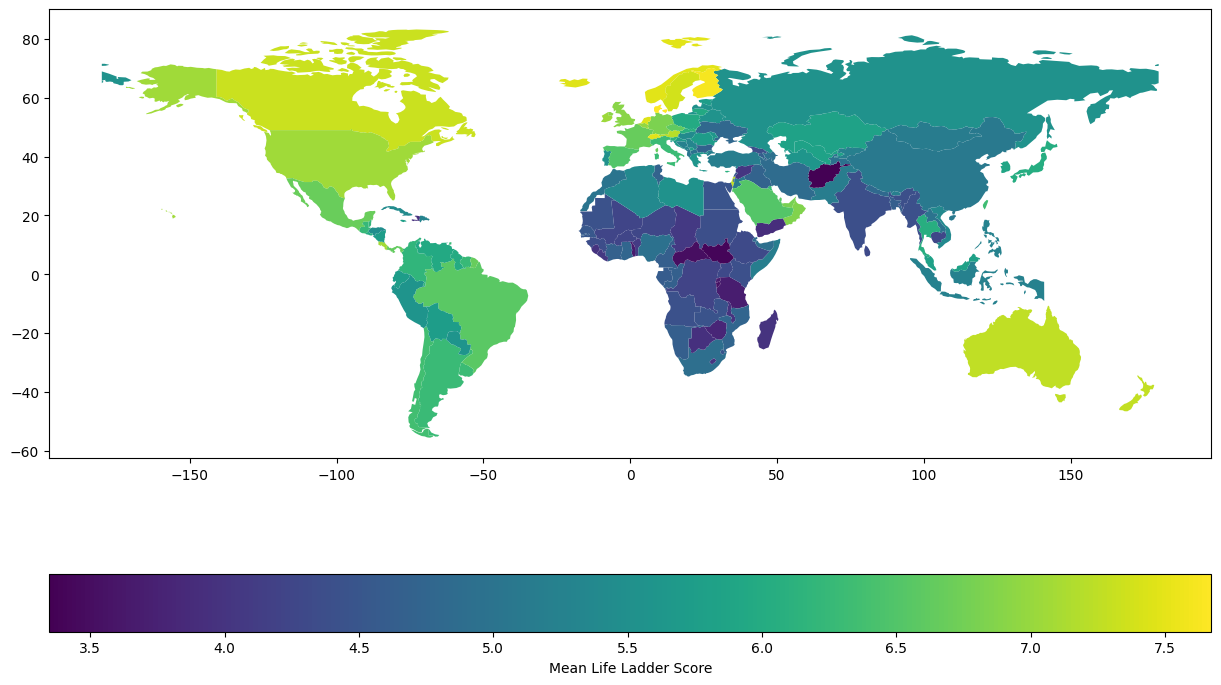

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
country_names = world['name'].tolist()
# print(country_names)

non_matching_countries = [country for country in mean_life_ladder_df['Country name'].unique() if country not in country_names]

# print("Countries in 'happy' DataFrame that don't match 'world':")
# print(non_matching_countries)

name_mapping = {
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Central African Republic': 'Central African Rep.',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Eswatini': 'eSwatini',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Ivory Coast': "Côte d'Ivoire",
    'Maldives': 'Maldives',
    'Malta': 'Malta',
    'Mauritius': 'Mauritius',
    'Singapore': 'Singapore',
    'Somaliland region': 'Somaliland',
    'South Sudan': 'S. Sudan',
    'State of Palestine': 'Palestine',
    'Taiwan Province of China': 'Taiwan',
    'Turkiye': 'Turkey',
    'United States': 'United States of America',}

mean_life_ladder_df['Country name'] = mean_life_ladder_df['Country name'].replace(name_mapping)
# print(len(mean_life_ladder_df['Country name'].unique()))

merged = world.set_index('name').join(mean_life_ladder_df.set_index('Country name'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Life Ladder', ax=ax, legend=True, 
            legend_kwds={'label': "Mean Life Ladder Score", 'orientation': "horizontal"})
plt.show()



In [16]:
mean_life_ladder_df_sorted = mean_life_ladder_df.sort_values(by='Life Ladder', ascending=False)

top_5 = mean_life_ladder_df_sorted.head(5)

middle_index = len(mean_life_ladder_df_sorted) // 2
middle_5 = mean_life_ladder_df_sorted.iloc[middle_index - 2 : middle_index + 3]

bottom_5 = mean_life_ladder_df_sorted.tail(5)

print("Top 5 Countries with mean life ladder score:\n", top_5)
print("\nMiddle 5 Countries with mean life ladder score:\n", middle_5)
print("\nBottom 5 Countries with mean life ladder score:\n", bottom_5)


Top 5 Countries with mean life ladder score:
     Country name  Life Ladder
39       Denmark     7.673529
48       Finland     7.619067
111       Norway     7.481750
142  Switzerland     7.474583
63       Iceland     7.458600

Middle 5 Countries with mean life ladder score:
        Country name  Life Ladder
161         Vietnam     5.385353
2           Algeria     5.377400
126          Serbia     5.316643
99       Montenegro     5.311769
41   Dominican Rep.     5.281824

Bottom 5 Countries with mean life ladder score:
              Country name  Life Ladder
123                Rwanda     3.654417
22                Burundi     3.548200
26   Central African Rep.     3.515000
135              S. Sudan     3.402000
0             Afghanistan     3.346643


## Highlights of the Findings

### Top Performing Countries:
- **Denmark** and **Finland**: These Northern European countries are leading the rankings with impressive scores of **7.67** and **7.62**, respectively.

### Middle Range Countries:
- **Vietnam** and **Algeria**: Representing the middle spectrum, with scores around **5.39** and **5.38**.

### Countries Facing Challenges:
- **Rwanda** and **Burundi**: At the lower end of the spectrum with scores of **3.65** and **3.55**, respectively.

### Geographic Observations:
- A striking trend in our analysis is the **geographic distribution** of happiness scores. 
    - **Western Hemisphere**: Countries, particularly in North America, tend to exhibit higher scores.
    - **Australia and Europe**: These regions also show strong well-being indicators, suggesting a correlation between geographical location and happiness, likely influenced by factors such as economic prosperity, cultural dynamics, and quality of governance.

### B. Compare the improvement rate across the countries

/var/folders/q_/_cgc3knd02ncvyg87h9rg1rh0000gn/T/ipykernel_4487/73138578.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


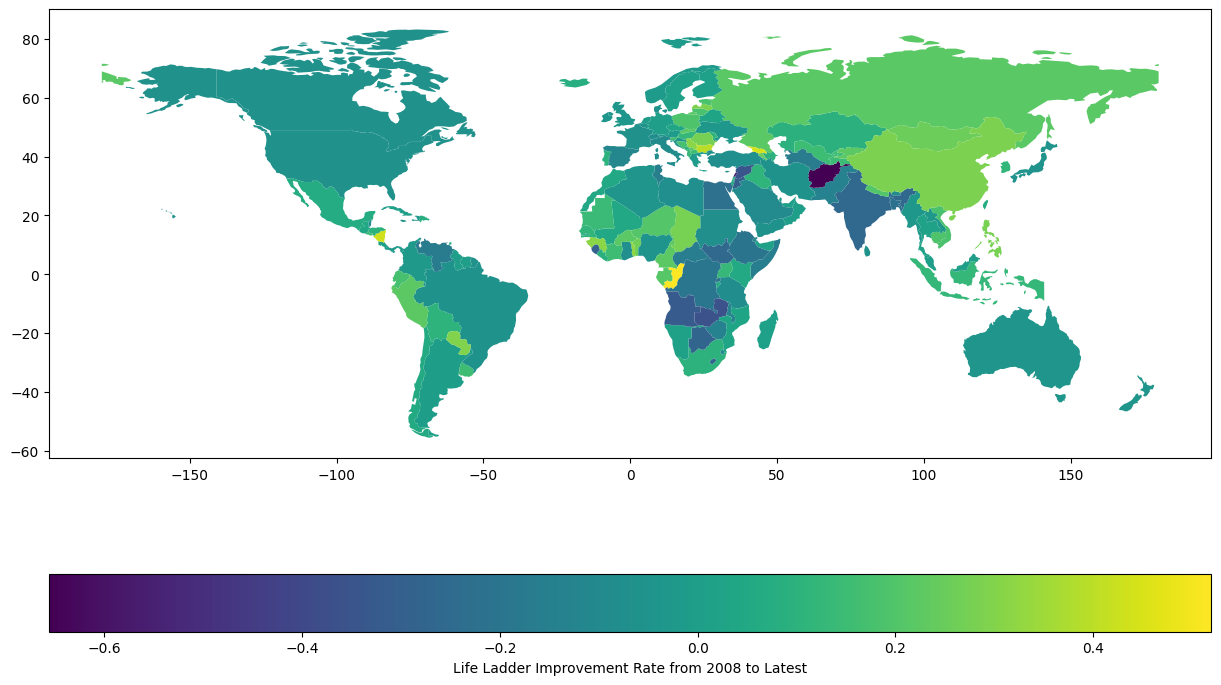

In [17]:
earliest_happy = happy.sort_values('year').groupby('Country name').first().reset_index()
latest_happy = happy.sort_values('year').groupby('Country name').last().reset_index()

happy_merged = pd.merge(earliest_happy[['Country name', 'Life Ladder', 'year']], 
                        latest_happy[['Country name', 'Life Ladder', 'year']], 
                        on='Country name', suffixes=('_earliest', '_latest'))

happy_merged['Improvement Rate'] = (happy_merged['Life Ladder_latest'] - happy_merged['Life Ladder_earliest']) / happy_merged['Life Ladder_earliest']
happy_merged['Country name'] = happy_merged['Country name'].replace(name_mapping)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]

world = world.merge(happy_merged[['Country name', 'Improvement Rate']], left_on='name', right_on='Country name', how='left')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Improvement Rate', ax=ax, legend=True,
           legend_kwds={'label': "Life Ladder Improvement Rate from 2008 to Latest", 'orientation': "horizontal"})
plt.show()

#### This shows the years between first year recorded and last year recorded for each countries


In [18]:
happy_merged['Years Between'] = happy_merged['year_latest'] - happy_merged['year_earliest']
happy_merged[['Country name', 'Years Between']]

,Country name,Years Between
0,Afghanistan,14
1,Albania,15
2,Algeria,11
3,Angola,3
4,Argentina,16
...,...,...
160,Venezuela,17
161,Vietnam,16
162,Yemen,12
163,Zambia,15


In [19]:
happy_merged_sorted = happy_merged.sort_values(by='Improvement Rate', ascending=False)

top_5_improvement = happy_merged_sorted.head(5)

middle_5_improvement = happy_merged_sorted.iloc[len(happy_merged_sorted) // 2 - 2 : len(happy_merged_sorted) // 2 + 3]

bottom_5_improvement = happy_merged_sorted.tail(5)

print("Top 5 Countries with Highest Improvement:\n", top_5_improvement)

Top 5 Countries with Highest Improvement:
     Country name  Life Ladder_earliest  year_earliest  Life Ladder_latest  \
32         Congo                 3.820           2008               5.805   
52       Georgia                 3.675           2006               5.293   
107    Nicaragua                 4.460           2006               6.392   
20      Bulgaria                 3.844           2007               5.378   
148         Togo                 3.202           2006               4.239   

     year_latest  Improvement Rate  Years Between  
32          2022          0.519634             14  
52          2022          0.440272             16  
107         2022          0.433184             16  
20          2022          0.399063             15  
148         2022          0.323860             16  


In [20]:
print("\nMiddle 5 Countries:\n", middle_5_improvement)


Middle 5 Countries:
     Country name  Life Ladder_earliest  year_earliest  Life Ladder_latest  \
132   Somaliland                 4.991           2009               5.057   
103      Namibia                 4.886           2007               4.949   
88    Madagascar                 3.980           2006               4.019   
141       Sweden                 7.376           2005               7.431   
48       Finland                 7.672           2006               7.729   

     year_latest  Improvement Rate  Years Between  
132         2012          0.013224              3  
103         2022          0.012894             15  
88          2022          0.009799             16  
141         2022          0.007457             17  
48          2022          0.007430             16  


In [21]:
print("\nBottom 5 Countries with Lowest Improvement:\n", bottom_5_improvement)


Bottom 5 Countries with Lowest Improvement:
     Country name  Life Ladder_earliest  year_earliest  Life Ladder_latest  \
3         Angola                 5.589           2011               3.795   
143        Syria                 5.323           2008               3.462   
163       Zambia                 4.824           2006               3.082   
82       Lebanon                 5.491           2005               2.352   
0    Afghanistan                 3.724           2008               1.281   

     year_latest  Improvement Rate  Years Between  
3           2014         -0.320988              3  
143         2015         -0.349615              7  
163         2021         -0.361111             15  
82          2022         -0.571663             17  
0           2022         -0.656015             14  


## Analysis of Global Happiness Trends

### Top Performing Countries:
- **Denmark** and **Finland**: Leading the rankings with impressive scores of **7.67** and **7.62**, respectively. These Northern European countries are known for their high standards of living and robust social support systems.

### Middle Range Countries:
- **Vietnam** and **Algeria**: Falling in the middle range with scores of **5.39** and **5.38**. These scores reflect moderate levels of happiness across diverse global regions.

### Countries Facing Challenges:
- **Central African Republic** and **South Sudan**: Positioned at the lower end of the spectrum, with scores of **3.52** and **3.40**. These scores highlight the significant challenges impacting the well-being in these regions.

### Improvement Rate Observations:
- **Significant Improvement**: Some African countries, along with China and Russia, show notable improvement rates, indicating positive changes in well-being.
- **Stability in High-Scoring Regions**: Countries in the Western Hemisphere, particularly North America, as well as Australia and certain European nations, maintain high happiness scores but exhibit only moderate improvement rates.

**Note on Improvement Rate Calculation:**

Due to the unavailability of consistent yearly data for some countries in the dataset, the improvement rates for the "Life Ladder" measure were calculated using the first and last available years of data for each country. This approach ensures that each country's improvement rate is based on the full range of available data, providing a more comprehensive view of changes over time. However, it's important to note that this method results in variable timeframes across different countries, which can affect comparability. The variation in time periods should be considered when interpreting the improvement rates.
